In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import math
import statsmodels.formula.api as smf

In [15]:
df0 = pd.read_excel('red_small.xlsx')

Text(0.5, 1.0, 'Histogram of the quality')

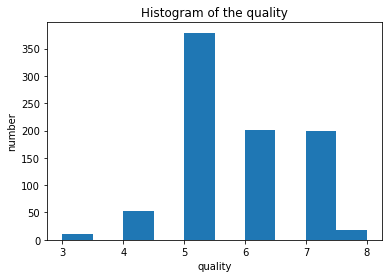

In [16]:
plt.hist(df0['quality'].values)

plt.xlabel('quality')
plt.ylabel('number')
plt.title('Histogram of the quality')

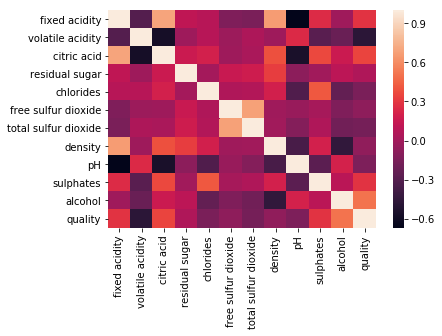

In [17]:
sns.heatmap(df0.corr(), annot=False)

In [31]:
df=pd.read_csv('red-wine-quality.csv')

C:\Users\dyw2000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


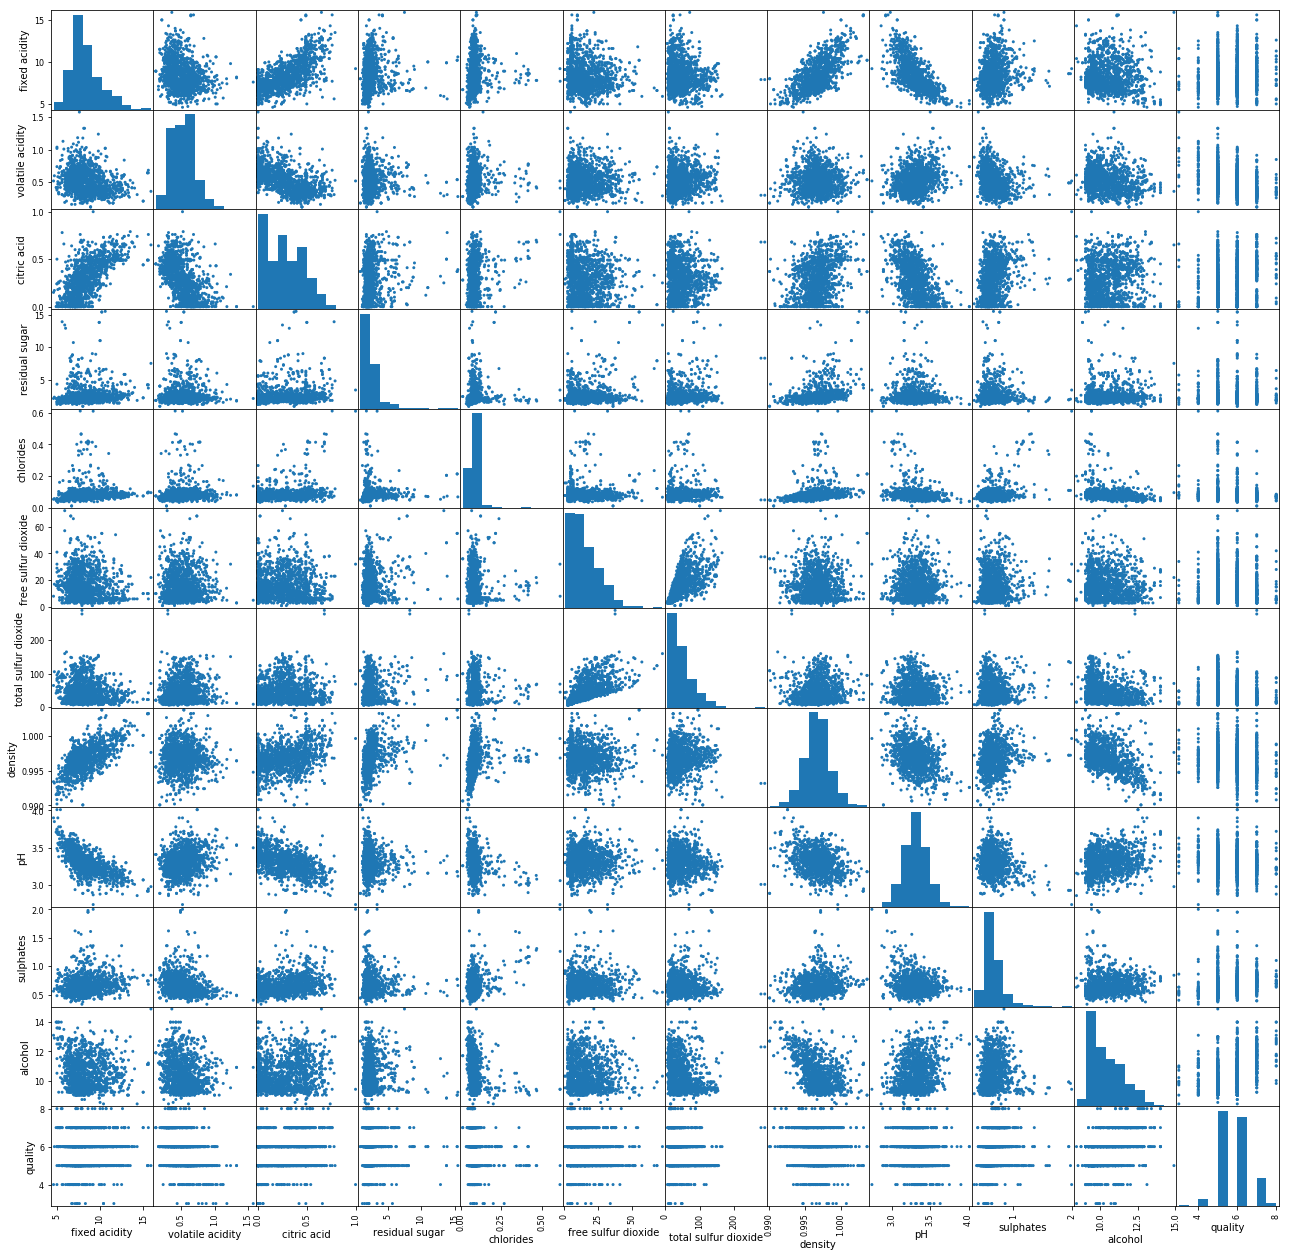

In [32]:
# 整体相关关系及频率图

fig, ax = plt.subplots(figsize=(22,22))
scatter_matrix(df, alpha=1, ax=ax)
plt.show()

In [33]:
df['fixed acidity'] = [math.log(item) for item in df['fixed acidity']]
df['volatile acidity'] = [math.log(item) for item in df['volatile acidity']]
df['residual sugar'] = [math.log(item+1) for item in df['residual sugar']]
df['chlorides'] = [math.log(item+1) for item in df['chlorides']]
df['total sulfur dioxide'] = [math.log(item) for item in df['total sulfur dioxide']]
df['sulphates'] = [math.log(item) for item in df['sulphates']]
df['alcohol'] = [math.log(item+1) for item in df['alcohol']]

In [51]:
df['residual sugar'] = [math.log(item+1) for item in df['residual sugar']]
df['chlorides'] = [math.log(item+1) for item in df['chlorides']]

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.001480,-0.356675,0.00,1.064711,0.073250,11.0,3.526361,0.9978,3.51,-0.579818,2.341806,5
1,2.054124,-0.127833,0.00,1.280934,0.093490,25.0,4.204693,0.9968,3.20,-0.385662,2.379546,5
2,2.054124,-0.274437,0.04,1.193922,0.088011,15.0,3.988984,0.9970,3.26,-0.430783,2.379546,5
3,2.415914,-1.272966,0.56,1.064711,0.072321,17.0,4.094345,0.9980,3.16,-0.544727,2.379546,6
4,2.001480,-0.356675,0.00,1.064711,0.073250,11.0,3.526361,0.9978,3.51,-0.579818,2.341806,5


# 变量分布图

No handles with labels found to put in legend.


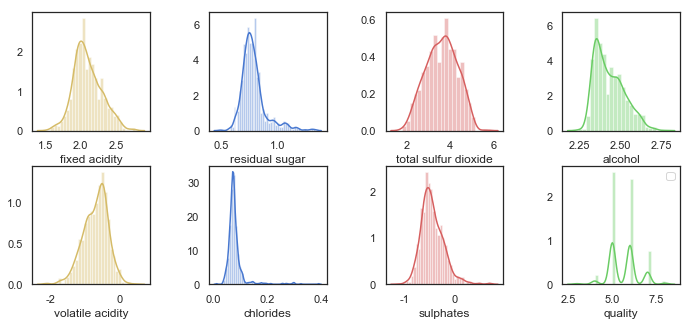

In [52]:
# 绘制变量分布图
fig, axes = plt.subplots(2,4,figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5,left=0.05,right=0.95, hspace=0.3)
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(df['fixed acidity'], ax = axes[0,0], color="y")
sns.distplot(df['volatile acidity'], ax = axes[1,0], color="y")
sns.distplot(df['residual sugar'], ax = axes[0,1], color="b")
sns.distplot(df['chlorides'], ax = axes[1,1], color="b")
sns.distplot(df['total sulfur dioxide'], ax = axes[0,2], color="r")
sns.distplot(df['sulphates'], ax = axes[1,2], color="r")
sns.distplot(df['alcohol'], ax = axes[0,3], color="g")
sns.distplot(df['quality'], ax = axes[1,3], color="g")

plt.legend(loc = 'best')
plt.show()

In [41]:
df1=pd.read_csv('red-wine-quality.csv')

No handles with labels found to put in legend.


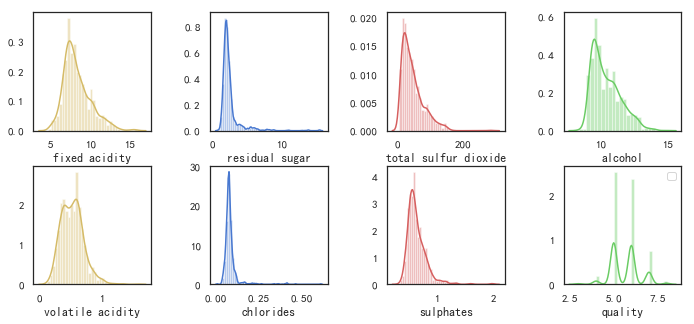

In [53]:
# 绘制变量分布图
fig, axes = plt.subplots(2,4,figsize=(10, 5))
plt.subplots_adjust(wspace = 0.5,left=0.05,right=0.95, hspace=0.3)
sns.set(style="white", palette="muted", color_codes=True)
sns.distplot(df1['fixed acidity'], ax = axes[0,0], color="y")
sns.distplot(df1['volatile acidity'], ax = axes[1,0], color="y")
sns.distplot(df1['residual sugar'], ax = axes[0,1], color="b")
sns.distplot(df1['chlorides'], ax = axes[1,1], color="b")
sns.distplot(df1['total sulfur dioxide'], ax = axes[0,2], color="r")
sns.distplot(df1['sulphates'], ax = axes[1,2], color="r")
sns.distplot(df1['alcohol'], ax = axes[0,3], color="g")
sns.distplot(df1['quality'], ax = axes[1,3], color="g")

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.legend(loc = 'best')
plt.show()

In [43]:
y=df.quality

In [56]:
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]                         
X=sm.add_constant(X)

In [57]:
est=sm.OLS(y,X).fit()

In [58]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     82.33
Date:                Sat, 21 Nov 2020   Prob (F-statistic):          5.88e-147
Time:                        22:11:46   Log-Likelihood:                -1565.7
No. Observations:                1599   AIC:                             3155.
Df Residuals:                    1587   BIC:                             3220.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   37.1987     22.856      1.628      0.104      -7.633      82.030
fixed acidity            0.4281      0.230      1.864      0.063      -0.022       0.879
volatile acidity        -0.5119      0.063     -8.140      0.000      -0.635      -0.389
citric acid             -0.3005      0.145     -2.070      0.039      -0.585      -0.016
residual sugar           0.2921      0.207      1.412      0.158      -0.114       0.698
chlorides               -2.5078      0.580     -4.325      0.000      -3.645      -1.370
free sulfur dioxide      0.0021      0.002      0.894      0.371      -0.002       0.007
total sulfur dioxide    -0.0906      0.036     -2.542      0.011      -0.160      -0.021
density                -38.3940     23.182     -1.656      0.098     -83.865       7.077
pH                      -0.3281      0.196     -1.674      0.094      -0.712       0.056
sulphates                0.8610      0.087      9.873      0.000       0.690       1.032
alcohol                  2.9871      0.324      9.220      0.000       2.352       3.623
==============================================================================
Omnibus:                       32.567   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.833
Skew:                          -0.194   Prob(JB):                     1.51e-11
Kurtosis:                       3.773   Cond. No.                     3.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""